# Import all the needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Import Dataset 

In [2]:
#import scopus journal csv file
scopus_journal = pd.read_csv('Scopus Journals.csv') 

In [3]:
#view the first 5 rows in the dataset
scopus_journal.head()  

,Scopus Source ID,Title,CiteScore,Percentile,Citation Count,Scholarly Output,Percent Cited,SNIP,SJR,RANK,...,Publisher,Type,Open Access,Scopus ASJC Code,Scopus Sub-Subject Area,Quartile,Top 10% (CiteScore Percentile),Scopus Source ID.1,Print ISSN,E-ISSN
0,10600153309,PLoS ONE,2.97,90,219890,73990,79,1.123,1.1,9,...,Public Library of Science,Journal,YES,1000,Multidisciplinary,Quartile1,Top 10%,https://www.scopus.com/sourceid/10600153309,19326203,NaN
1,12337,International Journal of Bifurcation and Chaos...,2.14,86,1773,830,60,0.875,0.674,13,...,World Scientific Publishing Co. Pte Ltd,Journal,NO,1000,Multidisciplinary,Quartile1,NaN,https://www.scopus.com/sourceid/12337,2181274,NaN
2,1300147101,Foundations of Science,0.76,64,111,146,33,0.651,0.292,33,...,Springer Netherlands,Journal,NO,1000,Multidisciplinary,Quartile2,NaN,https://www.scopus.com/sourceid/1300147101,12331821,NaN
3,13951,Arabian Journal for Science and Engineering,1.72,81,1955,1139,64,0.93,0.32,17,...,Springer Berlin,Journal,NO,1000,Multidisciplinary,Quartile1,NaN,https://www.scopus.com/sourceid/13951,13198025,21914281
4,14038,Shanghai Jiaotong Daxue Xuebao/Journal of Shan...,0.32,26,280,887,23,0.337,0.171,67,...,Shanghai Jiao Tong University,Journal,NO,1000,Multidisciplinary,Quartile3,NaN,https://www.scopus.com/sourceid/14038,10062467,NaN


In [4]:
#get to know more about the dataset using the info method
scopus_journal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52578 entries, 0 to 52577
Data columns (total 21 columns):
Scopus Source ID                  52578 non-null int64
Title                             52578 non-null object
CiteScore                         52578 non-null float64
Percentile                        52578 non-null int64
Citation
Count                    52578 non-null int64
Scholarly
Output                  52578 non-null int64
Percent
Cited                     52578 non-null int64
SNIP                              52578 non-null object
SJR                               52578 non-null object
RANK                              52578 non-null int64
Rank
Out Of                       52578 non-null int64
Publisher                         52578 non-null object
Type                              52578 non-null object
Open Access                       52578 non-null object
Scopus ASJC Code                  52578 non-null int64
Scopus Sub-Subject Area           52578 non-null object
Qu

# Check the Correlation between the features of the dataset

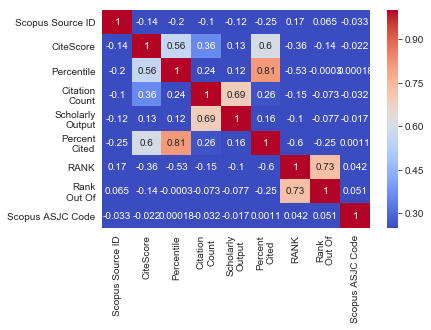

In [5]:
sns.heatmap(scopus_journal.corr(),cmap='coolwarm', annot=True, vmin=0.25)

# Select the Computer Science Subject Area

In [6]:
#covert the ASJC column to string datatype
asjc_code = scopus_journal['Scopus ASJC Code'].apply(str) 

In [7]:
#using lambda function to get the asjc of computer science starting with 17..
computer_journal = scopus_journal[asjc_code.apply(lambda x: x[:2]) == '17'] 

# Select the Computer Science Journal

In [8]:
not_journal = computer_journal.loc[computer_journal['Type'] != 'Journal']
computer_journal=computer_journal.drop(not_journal.index, axis=0)

In [9]:
computer_journal.head()

,Scopus Source ID,Title,CiteScore,Percentile,Citation Count,Scholarly Output,Percent Cited,SNIP,SJR,RANK,...,Publisher,Type,Open Access,Scopus ASJC Code,Scopus Sub-Subject Area,Quartile,Top 10% (CiteScore Percentile),Scopus Source ID.1,Print ISSN,E-ISSN
14544,11900154400,International Journal of Information Technolog...,1.29,60,63,49,63,0.635,0.191,82,...,IGI Publishing,Journal,NO,1700,General Computer Science,Quartile2,NaN,https://www.scopus.com/sourceid/11900154400,15541045,15541053
14545,12100154817,International Journal of Wireless and Mobile C...,0.49,22,137,280,30,0.252,0.168,160,...,Inderscience Enterprises Ltd,Journal,NO,1700,General Computer Science,Quartile4,NaN,https://www.scopus.com/sourceid/12100154817,17411084,17411092
14546,12100154833,ACM Transactions on Applied Perception,1.93,75,145,75,59,1.244,0.381,52,...,Association for Computing Machinery (ACM),Journal,NO,1700,General Computer Science,Quartile1,NaN,https://www.scopus.com/sourceid/12100154833,15443558,15443965
14547,12166,Mathematics and Computers in Simulation,1.88,73,733,389,59,0.981,0.526,54,...,Elsevier,Journal,NO,1700,General Computer Science,Quartile2,NaN,https://www.scopus.com/sourceid/12166,3784754,NaN
14548,12213,ACM Transactions on Computer Systems,3.84,90,146,38,71,2.746,0.537,20,...,Association for Computing Machinery (ACM),Journal,NO,1700,General Computer Science,Quartile1,Top 10%,https://www.scopus.com/sourceid/12213,7342071,NaN


# Check for empty/null cells in the dataset

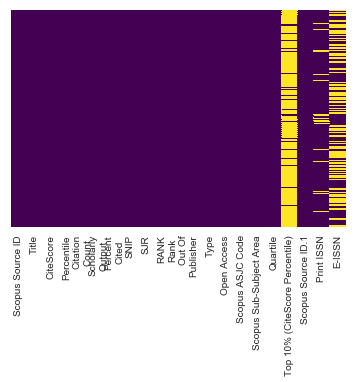

In [10]:
sns.heatmap(computer_journal.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
#create a new csv file to save the new dataset
computer_journal.to_csv(r'C:\Users\Gbubemi\Documents\#Project\journal-ranking-system-dataset\Computer Science Journals.csv', index=False) 